In [219]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [220]:
# numerical differentiation
def derivative(func, a, deg = 1, method = "central", h = 1e-5):
    assert method == "central", "method should be central (forward & backward not implemented yet)"
    n = (1 + (deg - 1) * 2)
    stored_dfs = []
    
    if method == "central":
        for i in range(int(-n/2), int(n/2) + 1, 1):
            stored_dfs.append((func(a + ((i+2)*h)) - func(a + (i*h))) / (2*h))
        for i in range(deg - 1):
            r = []
            for j in range(len(stored_dfs) - 2):
                r.append((stored_dfs[j + 2] - stored_dfs[j]) / (2*h))
            stored_dfs = r
        return stored_dfs[0]

In [221]:
'''
taylor series approximation of any,
    function: func
    with number of terms: nterms
    centered at point: a
    evaluate our approximation at: x

    returns: the value of our approximation at x
'''
def taylor_series_approximation(func, nterms, a, x, h):
    taylor_res = func(a)
    for i in range(1, nterms):
        #print(derivative(func, a, deg=i))
        taylor_res += (derivative(func, a, deg=i, h=h) * ((x - a)**i)) / math.factorial(i)
    return taylor_res

In [222]:
# MAE
def mae(y1, y2):
    return np.sum(np.abs(y1 - y2)) / y1.shape[0]

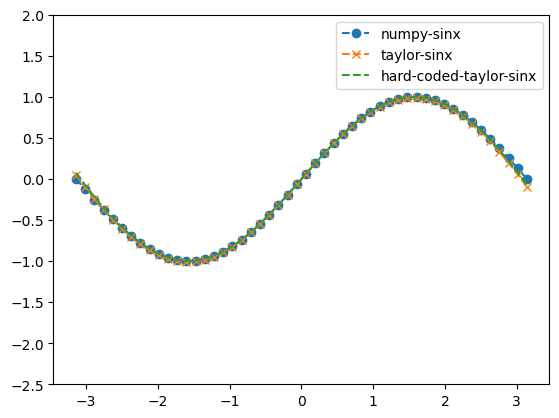

MAE (f vs f_approx):  1.455116e-02
MAE (f vs f_hard):  9.074338e-03


In [223]:
x = np.linspace(-math.pi, math.pi, 50)

# numpy approximation of sinx (consider as true value)
y = lambda x : np.sin(x)
f = y(x)

# sinx approximation from our taylor series function
y_approx = lambda x: taylor_series_approximation(func = y, nterms = 8, a = 0, x = x, h = 1e-2)
f_approx = y_approx(x)

# hard coded taylor series of sinx
y_hard = lambda x: x - (x**3/math.factorial(3)) + (x**5/math.factorial(5)) - (x**7/math.factorial(7))
f_hard = y_hard(x)

# plots results
plt.plot(x, f, "o--")
plt.plot(x, f_approx, "x--")
plt.plot(x, f_hard, "--")
plt.ylim(-2.5, 2)
plt.legend(["numpy-sinx", "taylor-sinx", "hard-coded-taylor-sinx"])
plt.show()

# MAE
print("MAE (f vs f_approx): ", "{:e}".format(mae(f, f_approx)))
print("MAE (f vs f_hard): ", "{:e}".format(mae(f, f_hard)))

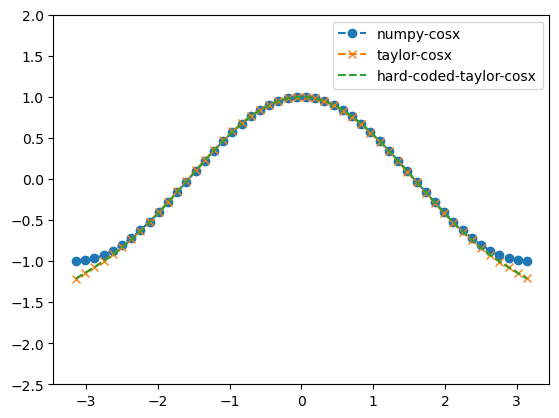

MAE (f vs f_approx):  3.190693e-02
MAE (f vs f_hard):  2.791541e-02


In [224]:
x = np.linspace(-math.pi, math.pi, 50)

# numpy approximation of cosx (consider as true value)
y = lambda x : np.cos(x)
f = y(x)

# cosx approximation from our taylor series function
y_approx = lambda x: taylor_series_approximation(func = y, nterms = 8, a = 0, x = x, h = 1e-2)
f_approx = y_approx(x)

# hard coded taylor series of cosx
y_hard = lambda x: 1 - (x**2/math.factorial(2)) + (x**4/math.factorial(4)) - (x**6/math.factorial(6))
f_hard = y_hard(x)

# plots results
plt.plot(x, f, "o--")
plt.plot(x, f_approx, "x--")
plt.plot(x, f_hard, "--")
plt.ylim(-2.5, 2)
plt.legend(["numpy-cosx", "taylor-cosx", "hard-coded-taylor-cosx"])
plt.show()

# MAE
print("MAE (f vs f_approx): ", "{:e}".format(mae(f, f_approx)))
print("MAE (f vs f_hard): ", "{:e}".format(mae(f, f_hard)))

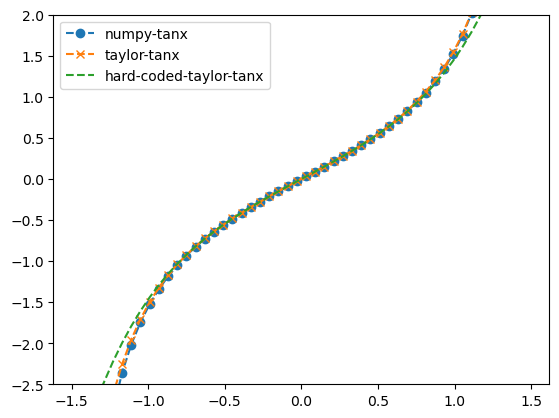

MAE (f vs f_approx):  2.916594e-01
MAE (f vs f_hard):  5.534619e-01


In [225]:
x = np.linspace(-math.pi/2 + 0.1, math.pi/2 - 0.1, 50)

# numpy approximation of tanx (consider as true value)
y = lambda x : np.tan(x)
f = y(x)

# tanx approximation from our taylor series function
y_approx = lambda x: taylor_series_approximation(func = y, nterms = 12, a = 0, x = x, h = 1e-2)
f_approx = y_approx(x)

# hard coded taylor series of tanx
y_hard = lambda x: x + (x**3/3) + (2*(x**5)/15) 
f_hard = y_hard(x)

# plots results
plt.plot(x, f, "o--")
plt.plot(x, f_approx, "x--")
plt.plot(x, f_hard, "--")
plt.ylim(-2.5, 2)
plt.legend(["numpy-tanx", "taylor-tanx", "hard-coded-taylor-tanx"])
plt.show()

# MAE
print("MAE (f vs f_approx): ", "{:e}".format(mae(f, f_approx)))
print("MAE (f vs f_hard): ", "{:e}".format(mae(f, f_hard)))